1 задание (Т4, 1.2)

Коэффициенты полинома: [ 5.39990002e+01 -2.47608815e+00 -4.75060150e-01  1.81790182e+01
 -3.70750404e+01 -2.79746482e+00  7.37381948e-02 -1.39109650e-01
 -2.26809212e-02  3.36013647e-02]


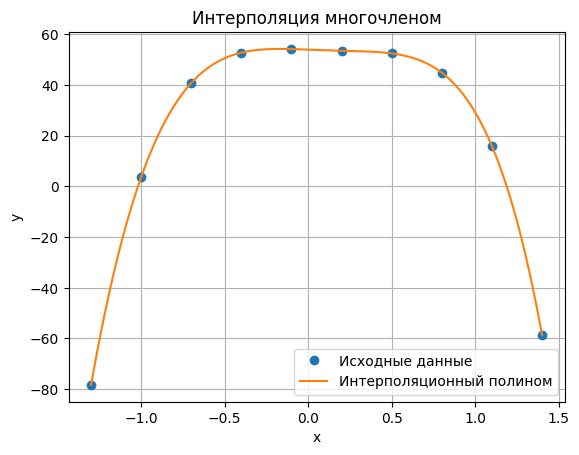

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-1.30, -1.00, -0.70, -0.40, -0.10, 0.20, 0.50, 0.80, 1.10, 1.40])
y = np.array([-78.34, 3.70, 40.85, 52.83, 54.22, 53.57, 52.51, 44.91, 16.00, -58.54])

n = len(x)  # Степень полинома
V = np.vander(x, n, increasing=True)

# Решаем систему уравнений V * a = y методом Гаусса
a = np.linalg.solve(V, y)
print("Коэффициенты полинома:", a)

def polynomial(x_val, coeffs):
    result = 0
    for i, c in enumerate(coeffs):
        result += c * x_val**i
    return result


x_plot = np.linspace(x.min(), x.max(), 500)
y_plot = polynomial(x_plot, a)


plt.plot(x, y, 'o', label='Исходные данные')
plt.plot(x_plot, y_plot, label='Интерполяционный полином')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция многочленом')
plt.legend()
plt.grid(True)
plt.show()

2 задание (2.6)

Аналитическое значение интеграла: 80.52267616071427
Численное значение интеграла методом левых прямоугольников: 81.59191060907972
Ошибка численного интегрирования: 1.0692344483654495


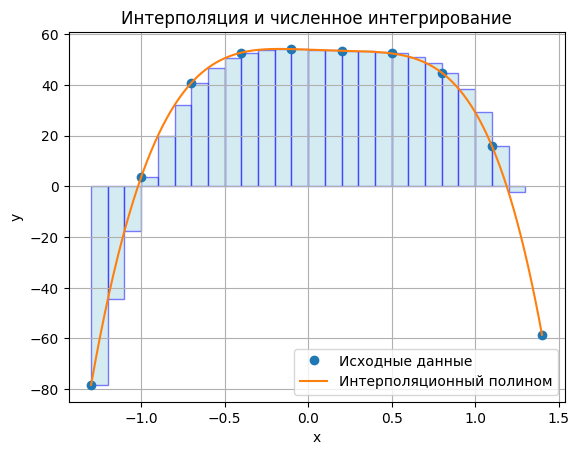

In [2]:
x_data = np.array([-1.30, -1.00, -0.70, -0.40, -0.10, 0.20, 0.50, 0.80, 1.10, 1.40])
y_data = np.array([-78.34, 3.70, 40.85, 52.83, 54.22, 53.57, 52.51, 44.91, 16.00, -58.54])
n = len(x_data)
V = np.vander(x_data, n, increasing=True)
a = np.linalg.solve(V, y_data)


def polynomial(x_val, coeffs):
    result = 0
    for i, c in enumerate(coeffs):
        result += c * x_val**i
    return result


def analytical_integral(coeffs, x_start, x_end):
    integral_coeffs = [c / (i + 1) for i, c in enumerate(coeffs)]
    integral_coeffs.insert(0, 0)  # добавляем свободный член
    return polynomial(x_end, integral_coeffs) - polynomial(x_start, integral_coeffs)

analytical_result = analytical_integral(a, x_data.min(), x_data.max())
print(f"Аналитическое значение интеграла: {analytical_result}")


# Метод левых прямоугольников
h = 0.1
x_numerical = np.arange(x_data.min(), x_data.max(), h)
numerical_result = 0
numerical_result = np.sum(polynomial(x_numerical[:-1], a)) * h
print(f"Численное значение интеграла методом левых прямоугольников: {numerical_result}")

error = abs(analytical_result - numerical_result)
print(f"Ошибка численного интегрирования: {error}")


x_plot = np.linspace(x_data.min(), x_data.max(), 500)
y_plot = polynomial(x_plot, a)

plt.plot(x_data, y_data, 'o', label='Исходные данные')
plt.plot(x_plot, y_plot, label='Интерполяционный полином')

for i in range(len(x_numerical)-1):
    rect_x = [x_numerical[i], x_numerical[i] + h, x_numerical[i] + h, x_numerical[i]]
    rect_y = [0, 0, polynomial(x_numerical[i], a), polynomial(x_numerical[i], a)]
    plt.fill(rect_x, rect_y, 'lightblue', edgecolor='blue', alpha=0.5)


plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция и численное интегрирование')
plt.legend()
plt.grid(True)
plt.show()

3 задание (3.2)

Недостающие значения:
x = -2.50, y = 4.50
x = -0.50, y = -5.50
x = 1.37, y = 14.10


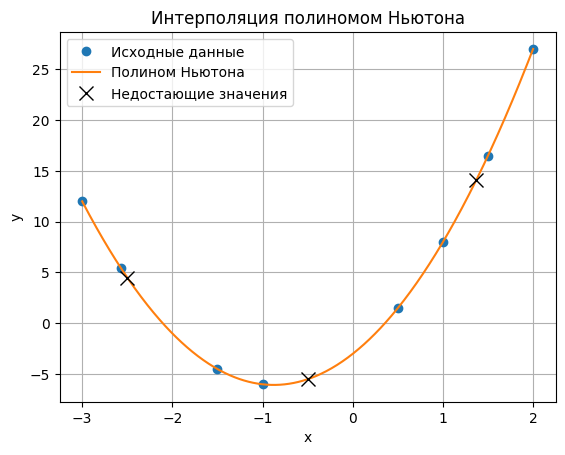

In [3]:
x_data = np.array([-3.00, -2.57, -1.50, -1.00, 0.50, 1.00, 1.50, 2.00])
y_data = np.array([12.00, 5.43, -4.50, -6.00, 1.50, 8.00, 16.50, 27.00])


def divided_differences(x, y):
    n = len(x)
    diffs = np.zeros((n, n))
    diffs[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            diffs[i, j] = (diffs[i+1, j-1] - diffs[i, j-1]) / (x[i+j] - x[i])
    return diffs


def newton_polynomial(x_val, x_data, divided_diffs):
    n = len(x_data)
    result = divided_diffs[0, 0]
    term = 1
    for j in range(1, n):
        term *= (x_val - x_data[j-1])
        result += divided_diffs[0, j] * term
    return result


diffs = divided_differences(x_data, y_data)

x_missing = np.array([-2.5, -0.5, 1.37])
y_missing = [newton_polynomial(x, x_data, diffs) for x in x_missing]

print("Недостающие значения:")
for x, y in zip(x_missing, y_missing):
    print(f"x = {x:.2f}, y = {y:.2f}")


x_plot = np.linspace(x_data.min(), x_data.max(), 500)
y_plot = [newton_polynomial(x, x_data, diffs) for x in x_plot]

plt.plot(x_data, y_data, 'o', label='Исходные данные')
plt.plot(x_plot, y_plot, label='Полином Ньютона')
plt.plot(x_missing, y_missing, 'x', label='Недостающие значения', color='black', markersize=10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция полиномом Ньютона')
plt.legend()
plt.grid(True)
plt.show()

4 задание (на основе 2 задания)

In [4]:
x_data = np.array([-1.30, -1.00, -0.70, -0.40, -0.10, 0.20, 0.50, 0.80, 1.10, 1.40])
y_data = np.array([-78.34, 3.70, 40.85, 52.83, 54.22, 53.57, 52.51, 44.91, 16.00, -58.54])
n = len(x_data)
V = np.vander(x_data, n, increasing=True)
a = np.linalg.solve(V, y_data)

def polynomial(x_val, coeffs):
    result = 0
    for i, c in enumerate(coeffs):
        result += c * x_val**i
    return result

def analytical_integral(coeffs, x_start, x_end):
    integral_coeffs = [c / (i + 1) for i, c in enumerate(coeffs)]
    integral_coeffs.insert(0, 0)
    return polynomial(x_end, integral_coeffs) - polynomial(x_start, integral_coeffs)

analytical_result = analytical_integral(a, x_data.min(), x_data.max())


def left_rectangle(f, x_start, x_end, h):
    x_numerical = np.arange(x_start, x_end, h)
    return np.sum(f(x_numerical[:-1])) * h


# Правило Рунге
h1 = 0.1
h2 = h1 / 2

integral_h1 = left_rectangle(lambda x: polynomial(x, a), x_data.min(), x_data.max(), h1)
integral_h2 = left_rectangle(lambda x: polynomial(x, a), x_data.min(), x_data.max(), h2)


runge_error = abs(integral_h2 - integral_h1) / (1 - (h2/h1)) #  (h2/h1) = 1/2 для метода левых прямоугольников

print(f"Погрешность по правилу Рунге: {runge_error}")


# Проверка условий корректности правила Рунге
# Правило Рунге предполагает, что погрешность имеет вид  O(h^p).  
# Для метода левых прямоугольников p=1. 
# Необходимо убедиться, что шаг достаточно мал, чтобы это условие выполнялось.

h1 = 0.1
h2 = h1 / 2

error_h1 = abs(analytical_result - integral_h1)
error_h2 = abs(analytical_result - integral_h2)

error_ratio = error_h2 / error_h1

print(f"Отношение погрешностей (если <= 2, то корректно): {error_ratio}")





# Экстраполяция Ричардсона
richardson_extrapolation = (2 * integral_h2 - integral_h1) # для метода левых прямоугольников p=1

richardson_error = abs(analytical_result - richardson_extrapolation)


print(f"Значение интеграла по экстраполяции Ричардсона: {richardson_extrapolation}")
print(f"Ошибка экстраполяции Ричардсона: {richardson_error}")

Погрешность по правилу Рунге: 0.7268682658004479
Отношение погрешностей (если <= 2, то корректно): 1.3399012568813227
Значение интеграла по экстраполяции Ричардсона: 82.31877887488017
Ошибка экстраполяции Ричардсона: 1.7961027141658974


Квадратура Гаусса (2 точек): 110.61431949514811, ошибка: 30.09164333443384
Квадратура Гаусса (3 точек): 80.52258729528158, ошибка: 8.886543268715741e-05
Квадратура Гаусса (4 точек): 80.52398335037351, ошибка: 0.0013071896592435905
Квадратура Гаусса (5 точек): 80.52267610925495, ошибка: 5.145932391315e-08
Квадратура Гаусса (6 точек): 80.52267635994136, ошибка: 1.9922708816011436e-07


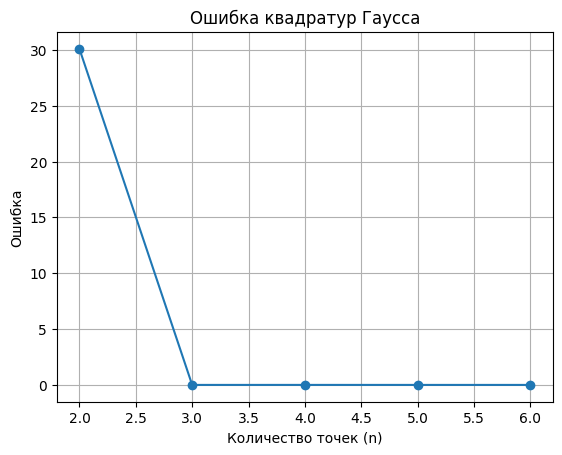

In [5]:
gauss_roots = {
    2: np.array([-0.577350269, 0.577350269]),
    3: np.array([-0.774596669, 0.0, 0.774596669]),
    4: np.array([-0.861136312, -0.339981044, 0.339981044, 0.861136312]),
    5: np.array([-0.906179846, -0.538469310, 0.0, 0.538469310, 0.906179846]),
    6: np.array([-0.932469514, -0.661209386, -0.238619186, 0.238619186, 0.661209386, 0.932469514])
}

gauss_weights = {
    2: np.array([1.0, 1.0]),
    3: np.array([0.555555556, 0.888888889, 0.555555556]),
    4: np.array([0.347854845, 0.652145155, 0.652145155, 0.347854845]),
    5: np.array([0.236926885, 0.478628670, 0.568888889, 0.478628670, 0.236926885]),
    6: np.array([0.171324492, 0.360761573, 0.467913935, 0.467913935, 0.360761573, 0.171324492])
}


def gauss_quadrature_table(f, x_start, x_end, n_points):
    roots = gauss_roots[n_points]
    weights = gauss_weights[n_points]
    transformed_roots = (x_end - x_start) / 2 * roots + (x_end + x_start) / 2
    transformed_weights = (x_end - x_start) / 2 * weights
    return np.sum(f(transformed_roots) * transformed_weights)


gauss_errors = []
n_points_range = range(2, 7)
for n_points in n_points_range:
    gauss_result = gauss_quadrature_table(lambda x: polynomial(x, a), x_data.min(), x_data.max(), n_points)
    gauss_error = abs(analytical_result - gauss_result)
    gauss_errors.append(gauss_error)
    print(f"Квадратура Гаусса ({n_points} точек): {gauss_result}, ошибка: {gauss_error}")


plt.plot(n_points_range, gauss_errors, marker='o')
plt.xlabel('Количество точек (n)')
plt.ylabel('Ошибка')
plt.title('Ошибка квадратур Гаусса')
plt.grid(True)
plt.show()